Missing values in dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
Training samples: 120, Testing samples: 30

📊 Model Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



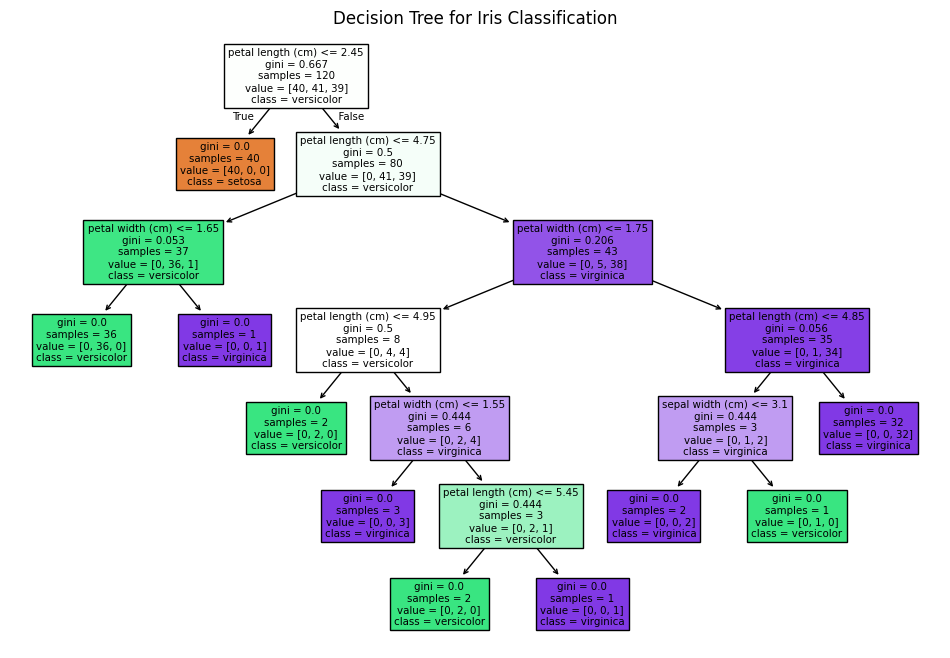


🔍 Sample Predictions:
       Actual   Predicted
0  versicolor  versicolor
1      setosa      setosa
2   virginica   virginica
3  versicolor  versicolor
4  versicolor  versicolor
5      setosa      setosa
6  versicolor  versicolor
7   virginica   virginica
8  versicolor  versicolor
9  versicolor  versicolor


In [ ]:
# ============================================
#  TASK 1: Classical ML with Scikit-learn
# Dataset: Iris Flower Dataset
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

# Step 2: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easy viewing
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df.head()

# Step 3: Data Preprocessing
# Check for missing values
print("Missing values in dataset:")
print(df.isnull().sum())

# (Iris dataset has no missing values, but if it had:)
# df = df.fillna(df.mean())

# Step 4: Split Data into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Step 5: Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = clf.predict(X_test)

# Step 7: Evaluate Model Performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')

print("\n📊 Model Evaluation Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")

# Step 8: Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Step 9: Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree for Iris Classification")
plt.show()

# Step 10: Visualize Predicted vs Actual
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.replace({0:'setosa', 1:'versicolor', 2:'virginica'}, inplace=True)
print("\n🔍 Sample Predictions:")
print(comparison.head(10))
